# PSO para Dilema dos Prisioneiros

importações necessárias para o projeto:

Este projeto é totalmente customizável para a execução de qualquer função de otimização. Bastando apenas criar a função de otimização extendendo da classe FunctionOptimizationBase em models/functions_optimization/  


In [1]:
from models.pso.pso_algorithm import PSOAlgorithm
from models.pso.swarm import Swarm
from models.functions_optimization.function_optimization_dp_individual_base import FunctionOptimizationDPIndividualBase as DPIndividual
from models.functions_optimization.function_optimization_dp_coletivo_base import FunctionOptimizationDPColetivoBase as DPColetivo
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# parâmetros de execução

In [3]:
particles_length = 50  # quantidade de particulas
global_comparison_length_10 = round(particles_length * 0.1)  # quantidade de particulas para comparar (10%)
global_comparison_length_30 = round(particles_length * 0.3)  # quantidade de particulas para comprar (30%)
lower_limit = 0.0  # limite inferior da função
upper_limit = 1.0  # limite superior da função
max_interation = 1000  # máximo de interações
max_execution = 5  # máximo de execuções 

c = 3  # quantidade de posições cooperativas para aplicação de 1 bonus
bonus = -0.5  # bonus a ser dado por cada bonus a ser dado
inertial_ini = 1.2  # valor da variável de inércia inicial
inertial_final = 0.8  # valor da variável de inércia final
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social

## Ajuste de parâmetros

### Verificando os parâmetros da constante de social information e cognitive information

CI e SI possuem o mesmo valor

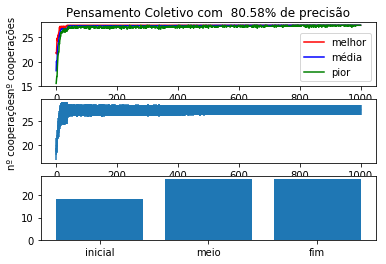

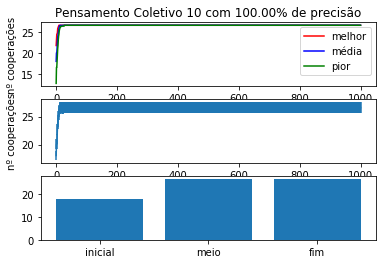

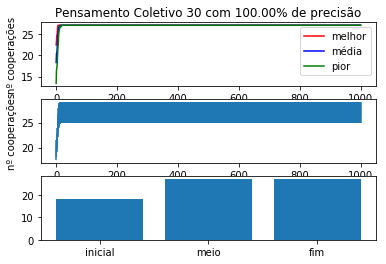

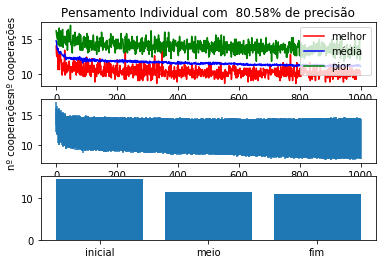

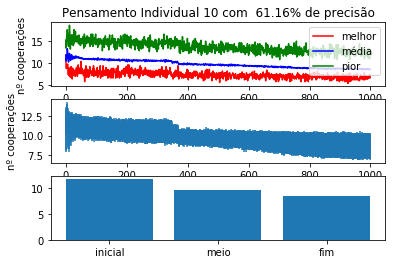

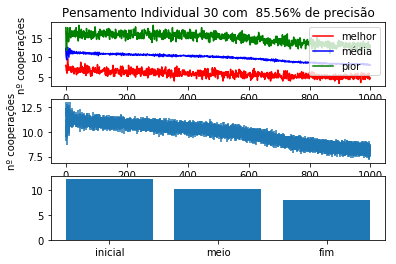

In [4]:
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social

functions_optimization = []
functions_optimization.append([DPColetivo(lower_limit, upper_limit), 'Coletivo'])
functions_optimization.append([DPColetivo(lower_limit, upper_limit, global_comparison_length=global_comparison_length_10), 'Coletivo 10'])
functions_optimization.append([DPColetivo(lower_limit, upper_limit, global_comparison_length=global_comparison_length_30), 'Coletivo 30'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit), 'Individual'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit, global_comparison_length=global_comparison_length_10), 'Individual 10'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit, global_comparison_length=global_comparison_length_30), 'Individual 30'])

for e in range(len(functions_optimization)):
    
    algorithm = PSOAlgorithm(functions_optimization[e][0], max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, functions_optimization[e][0], inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento {functions_optimization[e][1]} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()

CI possui o dobro do valor de SI

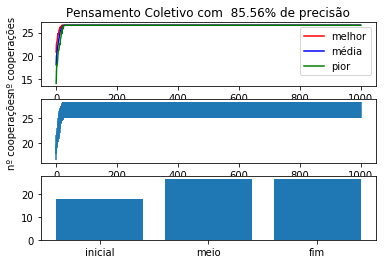

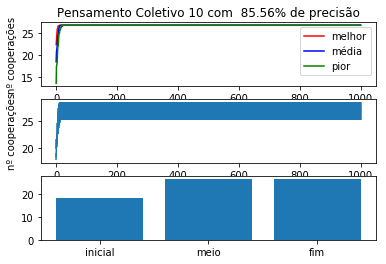

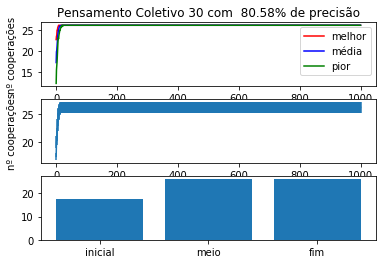

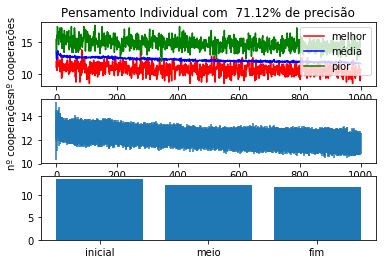

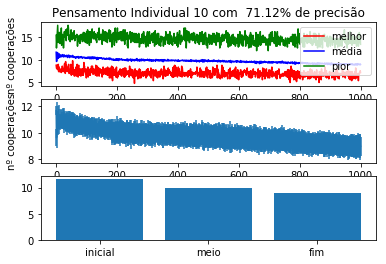

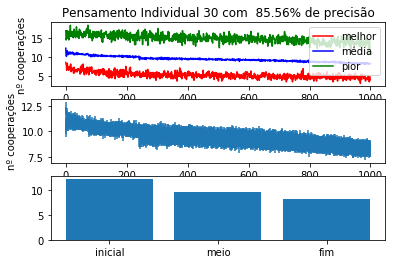

In [5]:
ci = 2.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social

functions_optimization = []
functions_optimization.append([DPColetivo(lower_limit, upper_limit), 'Coletivo'])
functions_optimization.append([DPColetivo(lower_limit, upper_limit, global_comparison_length=global_comparison_length_10), 'Coletivo 10'])
functions_optimization.append([DPColetivo(lower_limit, upper_limit, global_comparison_length=global_comparison_length_30), 'Coletivo 30'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit), 'Individual'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit, global_comparison_length=global_comparison_length_10), 'Individual 10'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit, global_comparison_length=global_comparison_length_30), 'Individual 30'])

for e in range(len(functions_optimization)):
    
    algorithm = PSOAlgorithm(functions_optimization[e][0], max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, functions_optimization[e][0], inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento {functions_optimization[e][1]} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()

SI possui o dobro de valor do CI

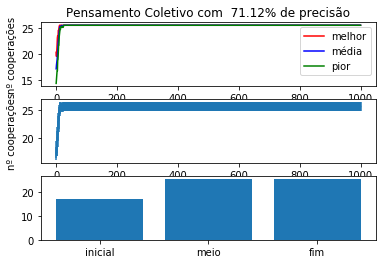

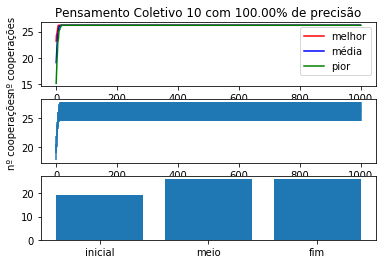

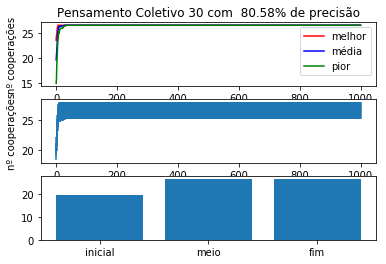

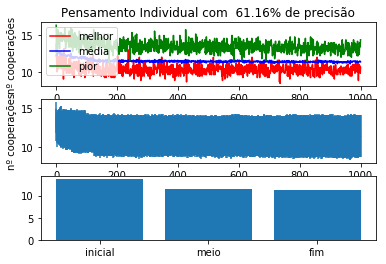

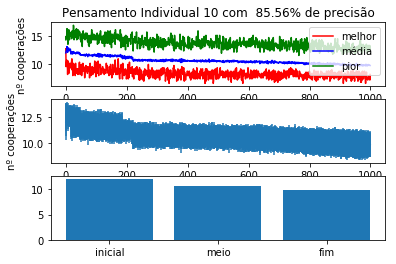

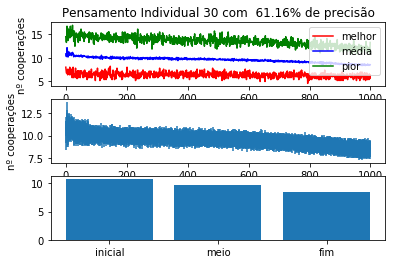

In [7]:
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 2.0  # valor da constante de relevância da informações social

functions_optimization = []
functions_optimization.append([DPColetivo(lower_limit, upper_limit), 'Coletivo'])
functions_optimization.append([DPColetivo(lower_limit, upper_limit, global_comparison_length=global_comparison_length_10), 'Coletivo 10'])
functions_optimization.append([DPColetivo(lower_limit, upper_limit, global_comparison_length=global_comparison_length_30), 'Coletivo 30'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit), 'Individual'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit, global_comparison_length=global_comparison_length_10), 'Individual 10'])
functions_optimization.append([DPIndividual(lower_limit, upper_limit, global_comparison_length=global_comparison_length_30), 'Individual 30'])

for e in range(len(functions_optimization)):
    
    algorithm = PSOAlgorithm(functions_optimization[e][0], max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, functions_optimization[e][0], inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento {functions_optimization[e][1]} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()

### Verificando a influência do bonus 

#### Individual com bonus variando

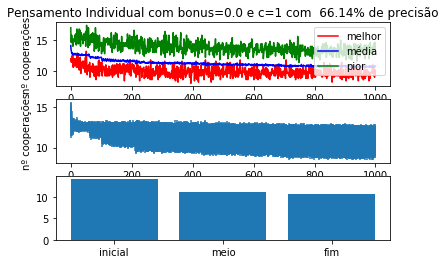

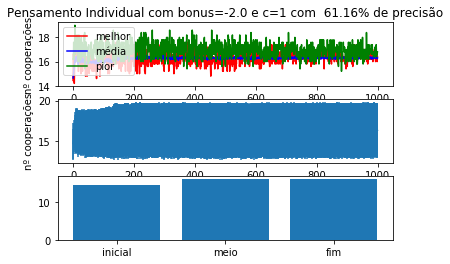

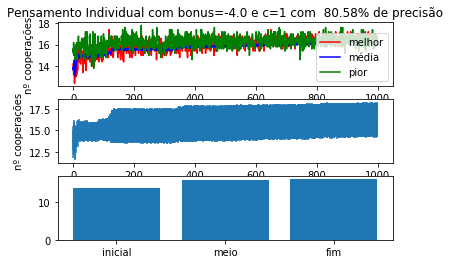

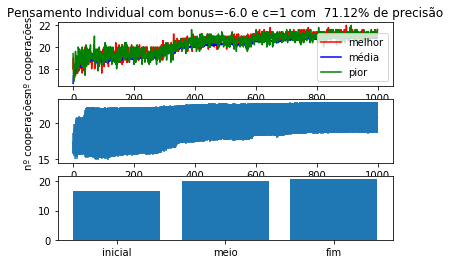

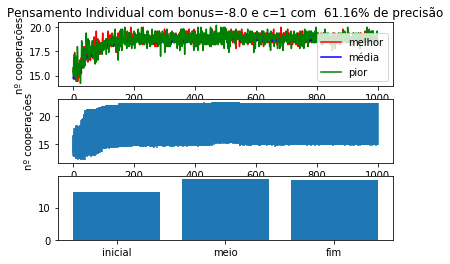

In [8]:
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social
c = 1 # tamanho da cadeia de cooperação

for e in range(0,10,2):
    bonus = np.float_(-e)  # bonus a ser dado por cada cadeia de cooperação
    
    function_optimization = DPIndividual(lower_limit, upper_limit, bonus=bonus, c=c)
    algorithm = PSOAlgorithm(function_optimization, max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, function_optimization, inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento Individual com bonus={bonus} e c={c} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()

#### Individual 10 com bonus variando

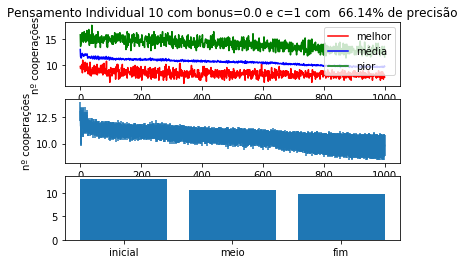

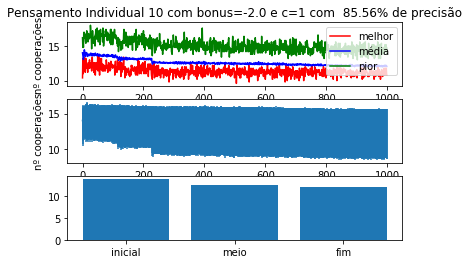

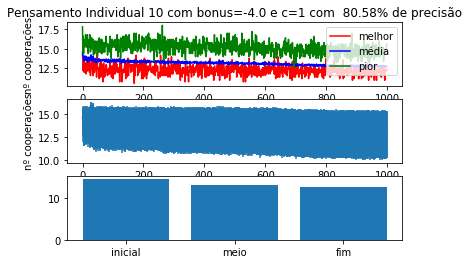

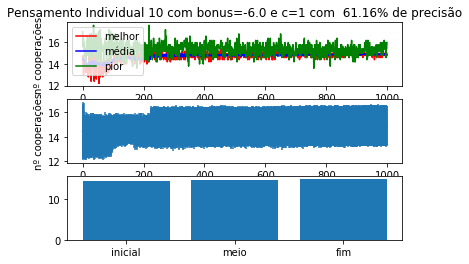

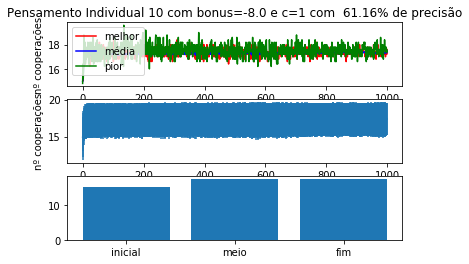

In [9]:
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social
c = 1 # tamanho da cadeia de cooperação

for e in range(0,10,2):
    bonus = np.float_(-e)  # bonus a ser dado por cada cadeia de cooperação
    
    function_optimization = DPIndividual(lower_limit, upper_limit, global_comparison_length=global_comparison_length_10, bonus=bonus, c=c)
    algorithm = PSOAlgorithm(function_optimization, max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, function_optimization, inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento Individual 10 com bonus={bonus} e c={c} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()
    

#### individual 30 com bonus variando

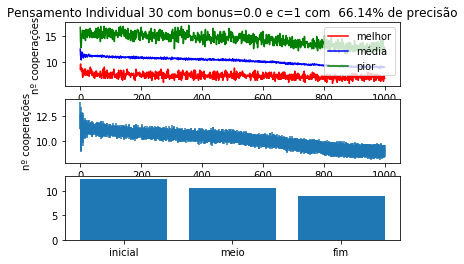

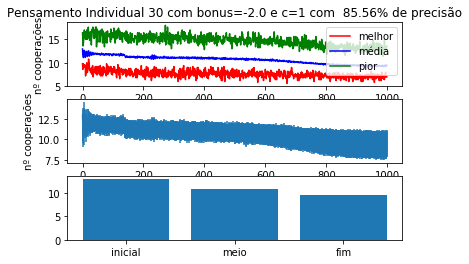

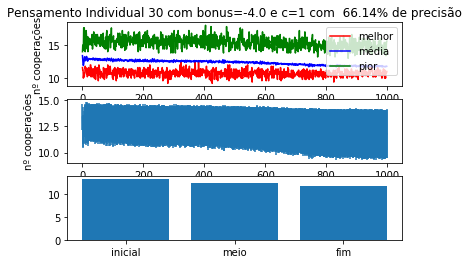

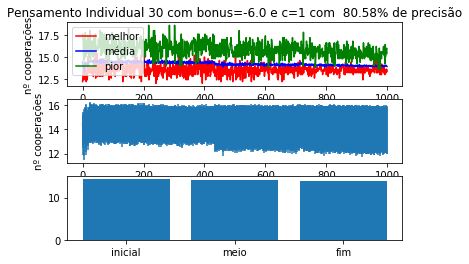

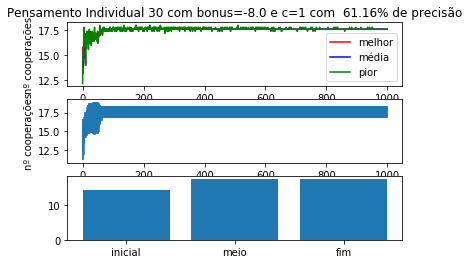

In [10]:
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social
c = 1 # tamanho da cadeia de cooperação

for e in range(0,10,2):
    bonus = np.float_(-e)  # bonus a ser dado por cada cadeia de cooperação
    
    function_optimization = DPIndividual(lower_limit, upper_limit, global_comparison_length=global_comparison_length_30, bonus=bonus, c=c)
    algorithm = PSOAlgorithm(function_optimization, max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, function_optimization, inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento Individual 30 com bonus={bonus} e c={c} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()

#### Coletivo com bonus variando

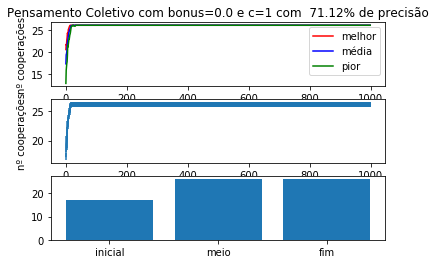

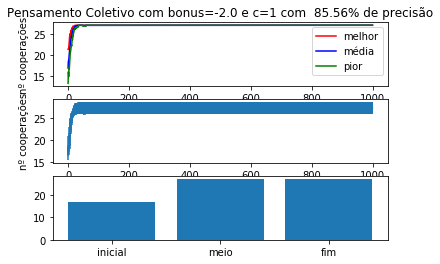

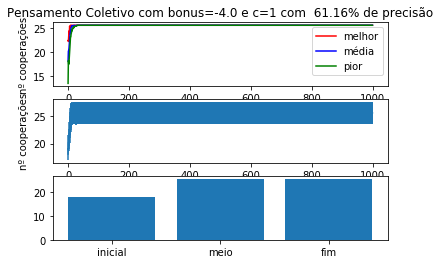

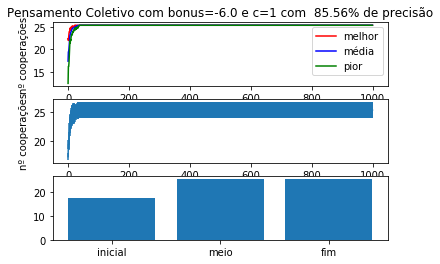

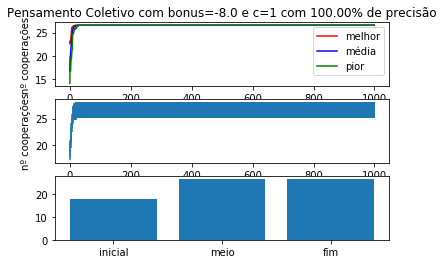

In [11]:
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social
c = 1 # tamanho da cadeia de cooperação

for e in range(0,10,2):
    bonus = np.float_(-e)  # bonus a ser dado por cada cadeia de cooperação
    
    function_optimization = DPColetivo(lower_limit, upper_limit, bonus=bonus, c=c)
    algorithm = PSOAlgorithm(function_optimization, max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, function_optimization, inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento Coletivo com bonus={bonus} e c={c} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()

#### Coletivo 10 com bonus variando

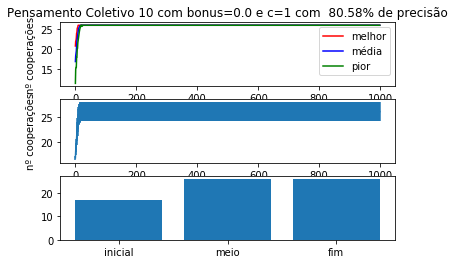

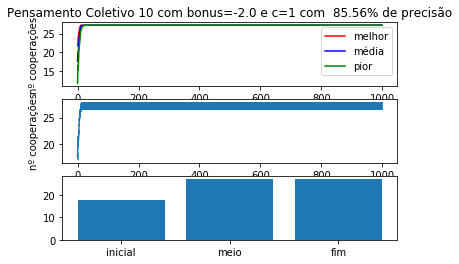

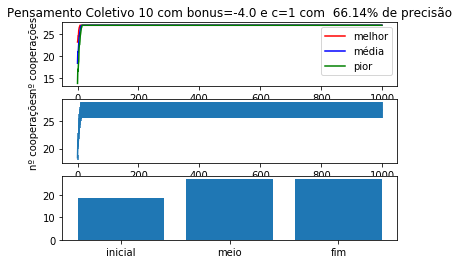

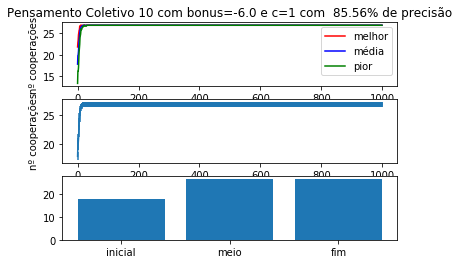

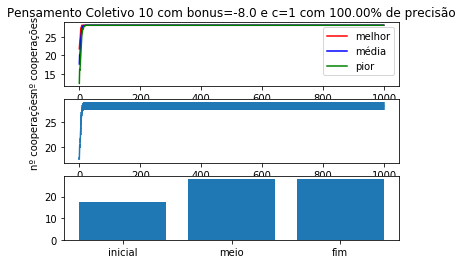

In [12]:
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social
c = 1 # tamanho da cadeia de cooperação

for e in range(0,10,2):
    bonus = np.float_(-e)  # bonus a ser dado por cada cadeia de cooperação
    
    function_optimization = DPColetivo(lower_limit, upper_limit, global_comparison_length=global_comparison_length_10, bonus=bonus, c=c)
    algorithm = PSOAlgorithm(function_optimization, max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, function_optimization, inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento Coletivo 10 com bonus={bonus} e c={c} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()

#### Coletivo 30 com bonus variando

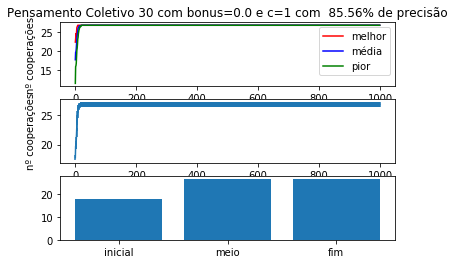

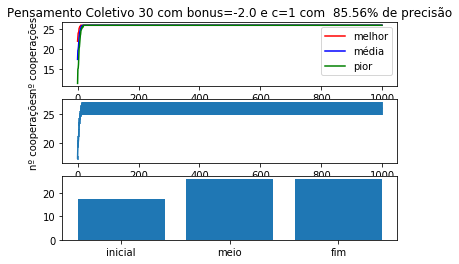

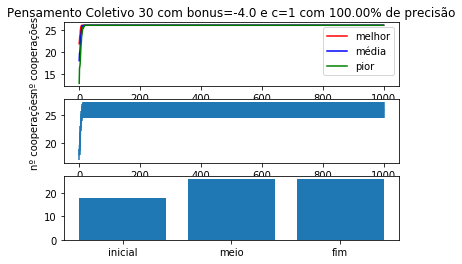

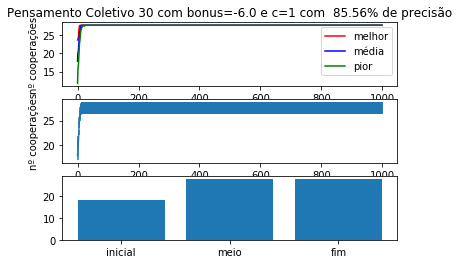

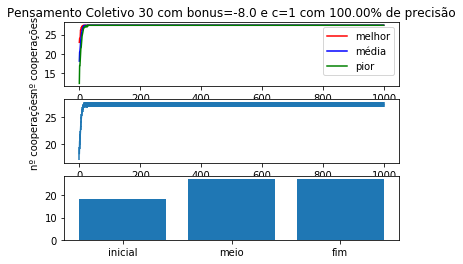

In [13]:
ci = 1.0  # valor da constante da relevância da informação pessoal
si = 1.0  # valor da constante de relevância da informações social
c = 1 # tamanho da cadeia de cooperação

for e in range(0,10,2):
    bonus = np.float_(-e)  # bonus a ser dado por cada cadeia de cooperação
    
    function_optimization = DPColetivo(lower_limit, upper_limit, global_comparison_length=global_comparison_length_30, bonus=bonus, c=c)
    algorithm = PSOAlgorithm(function_optimization, max_interation, max_execution)
    algorithm.exec_algorithm(particles_length, function_optimization, inertial_ini, inertial_final, ci, si)
    
    best, err_best = algorithm.get_best()
    avarage, err_avarage = algorithm.get_avarage()
    lowest, err_lowest = algorithm.get_lowest()
    entropy = algorithm.get_entropy()
    
    plotarBar = [avarage[0], avarage[max_interation//2], avarage[-1]]

    plt.figure(e)

    plt.subplot(311)
    plt.title(f'Pensamento Coletivo 30 com bonus={bonus} e c={c} com {entropy*100:6.2f}% de precisão')
    plt.plot(best, 'r-', label='melhor') 
    plt.plot(avarage, 'b-', label='média')
    plt.plot(lowest, 'g-', label='pior')
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')
    plt.legend()
    
    plt.subplot(312)
    plt.errorbar(np.arange(max_interation), avarage, yerr=err_avarage)
    plt.xlabel('nº iteração')
    plt.ylabel('nº cooperações')

    plt.subplot(313)
    plt.bar(np.arange(3), plotarBar)
    plt.xticks(np.arange(3), ('inicial', 'meio', 'fim'))
    plt.show()